# Introducción a la visualización de datos estadítica con SEABORN

El análisis estadístico es un proceso de comprensión de cómo las variables de un conjunto de datos se relacionan entre sí y cómo esas relaciones dependen de otras variables. La visualización puede ser un componente central de este proceso porque, cuando los datos se visualizan correctamente, el sistema visual humano puede ver tendencias y patrones que indican una relación.

## seaborn.replot function

La relación entre dos variables, x e y, se pueden mostrar utilizando los parametros "hue=tono", "size=tamaño" o "style=estilo" que lo que nos ofrecen es un mapeo a variables visuales para poder ser indetificados visualmente.Utilizar varias dimensiones, puede dar pie a que el gráfico sea ilegible o no interpretable.





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


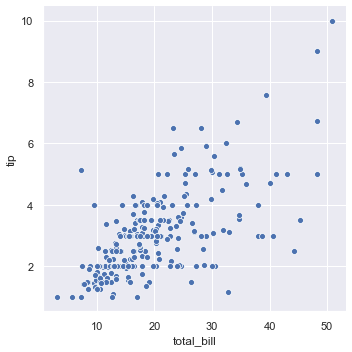

In [2]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips);

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


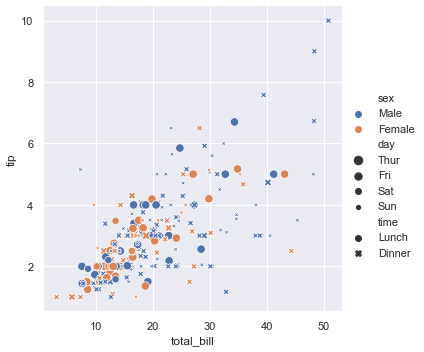

In [4]:
sns.relplot(x="total_bill", y="tip", hue="sex",size="day",style="time", data=tips);


Como podemos ver en el anterior gráfico, utilizando todas las variables mapeads visualmente da pie a que el gráfico sea ilegible

Sin embargo, usar semántica redundante (es decir, tanto el tono como el estilo para la misma variable) puede ser útil para hacer que los gráficos sean más accesibles.


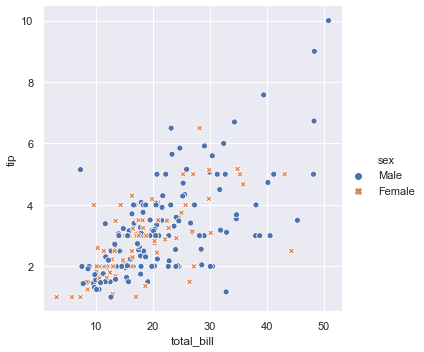

In [5]:
sns.relplot(x="total_bill", y="tip", hue="sex",style="sex", data=tips);


Como podemos ver en el gráfico anterior, jugando con el color y estilo, hacemos que el gráfico sea mas legible e interpretable

Para visualizar los diferentes parámetros que podemos pasarle: https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot


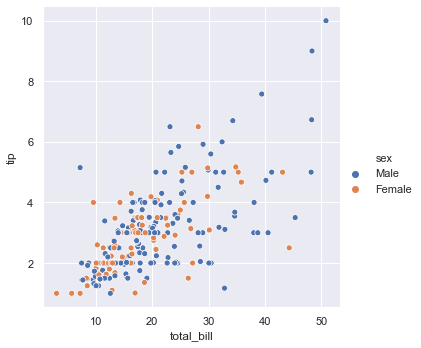

In [6]:
import seaborn as sns
sns.set(style="ticks")
sns.set(style="darkgrid")
tips = sns.load_dataset("tips")
g = sns.relplot(x="total_bill", y="tip", hue="sex", data=tips)

A su vez, esta funcion nos permite ser combinada con Facegrid y asi poder combinar las variables visuales en diferentes gráficos para poder analizar visualmente. Esto lo podemos utilizar con los parametros row o col, especificando que variable es la que queremos dividir

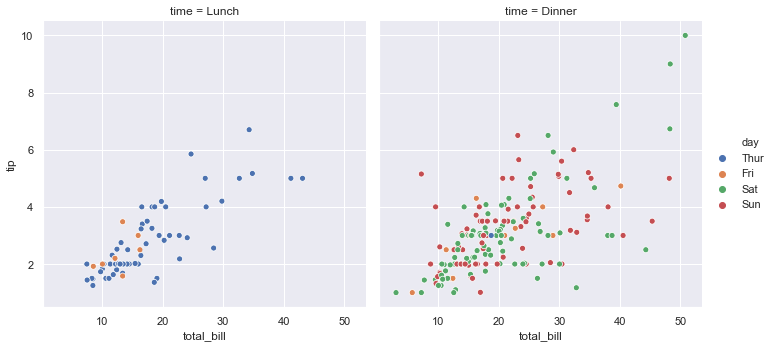

In [7]:
 g= sns.relplot(x="total_bill", y="tip",hue="day", col="time", data=tips)

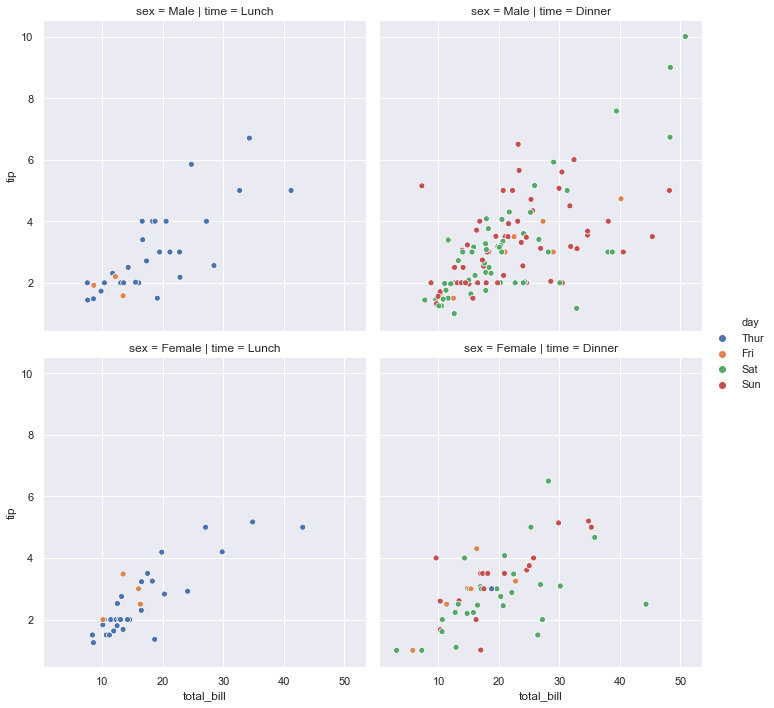

In [8]:
 g= sns.relplot(x="total_bill", y="tip",hue="day", col="time", row="sex", data=tips)

El parámetro wrap nos permite visualizar en diferentes columnas dentro del mimso FaceGrid

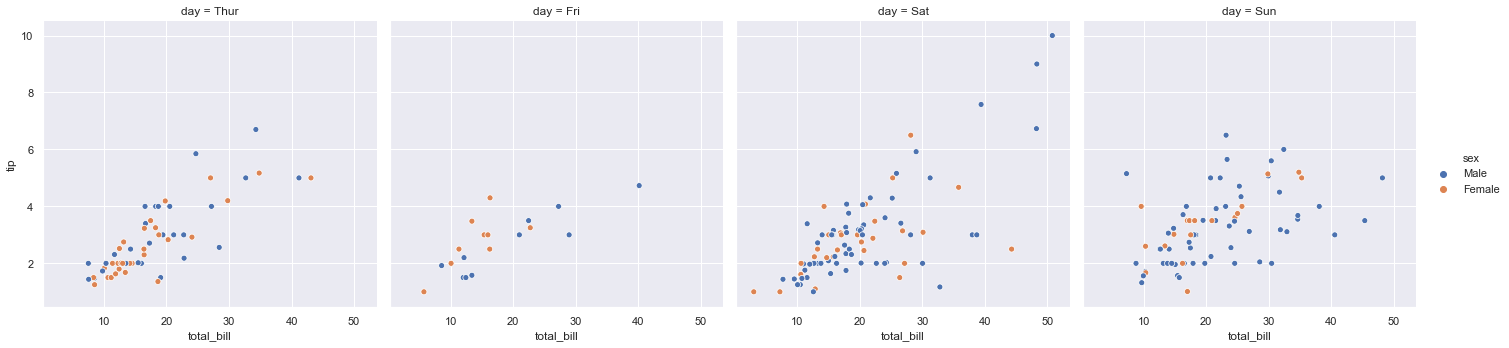

In [9]:
 g = sns.relplot(x="total_bill", y="tip", hue="sex", col="day", col_wrap=4, data=tips)

## Scatterplot function

Nos permite representar un grafico simple entre dos variables

https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot

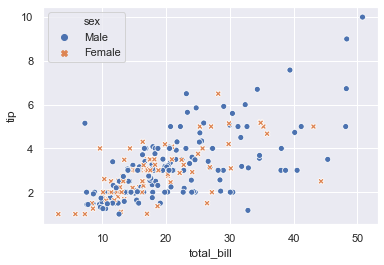

In [10]:
fig= sns.scatterplot(x="total_bill", y="tip", hue="sex",style="sex",data=tips)

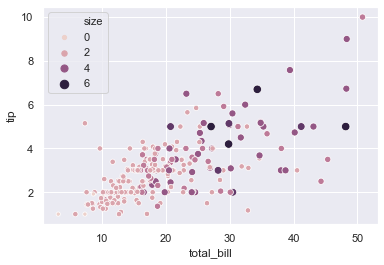

In [11]:
ax = sns.scatterplot(x="total_bill", y="tip", hue="size", size="size", data=tips)

Podemos modificar los colores, por ejemplo utilizando las paletas de colores

https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette

Paleta de colores por defecto: 

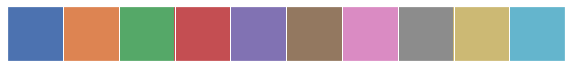

In [12]:
sns.palplot(sns.color_palette())

Generar una paleta basada en Matplotib

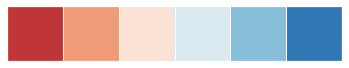

In [13]:
paleta =sns.palplot(sns.color_palette("RdBu", n_colors=6))


Añadiendo por ejemplo la paleta cubehelix:https://jiffyclub.github.io/palettable/cubehelix/

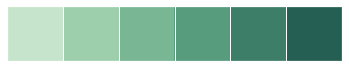

In [14]:
sns.palplot(sns.color_palette("ch:2.5,-.2,dark=.3"))

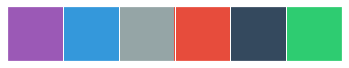

In [15]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))


Para definir nuestra propia paleta podemos utilizar  la funcion color_palette o pasarle directamente los colores. Esto va a ir asociado al parámetro hue

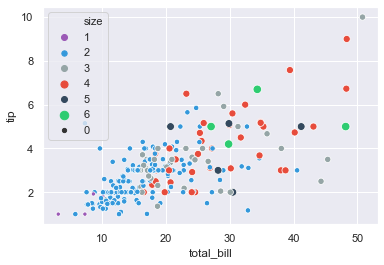

In [16]:
ax = sns.scatterplot(x="total_bill", y="tip", hue="size", size="size", data=tips, palette=["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"])

## seaborn.lineplot

Dibujar la relación entre x e y mediante una línea. Interesante por ejemplo para consultar tendencias o cuando una de las dos variables es de tipo tiempo (timestamped data)

Los parámetros para poder modificar son los mismos que en el caso de scatter

https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot

In [17]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


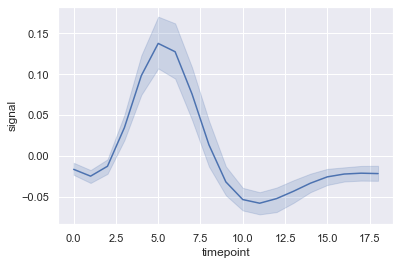

In [18]:
ax = sns.lineplot(x="timepoint", y="signal", data=fmri)

Parámetro "ci" es el tamaño del intervalo de confianza a dibujar cuando se agrega con un estimador

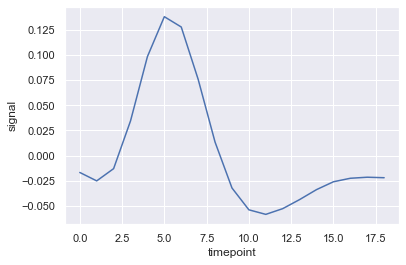

In [19]:
ax = sns.lineplot(x="timepoint", y="signal", data=fmri, ci=None)

Vamos a cambiar el parámetro jugando con el estilo y el tono en base a un campo del dataset, en este caso "event"

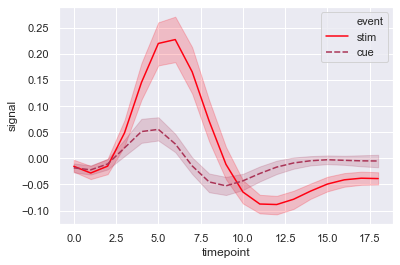

In [20]:
ax = sns.lineplot(x="timepoint", y="signal", hue="event", style="event",data=fmri, palette=['#ff0011','#aa3456'])

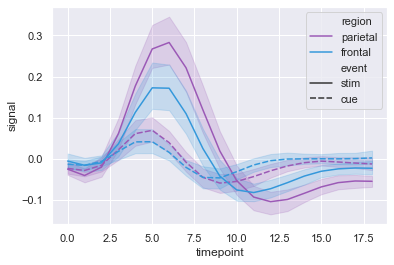

In [21]:
ax = sns.lineplot(x="timepoint", y="signal",hue="region", style="event", data=fmri, palette= ["#9b59b6", "#3498db"])

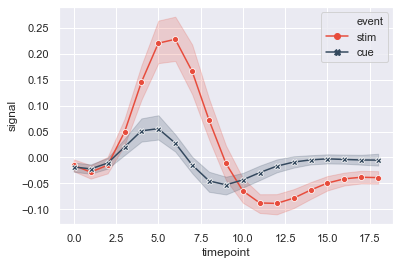

In [22]:
ax = sns.lineplot(x="timepoint", y="signal", hue="event", style="event",markers=True, dashes=False, data=fmri, palette=[ "#e74c3c", "#34495e"])

In [23]:
dots = sns.load_dataset("dots").query("align == 'dots'")
dots.head()


,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


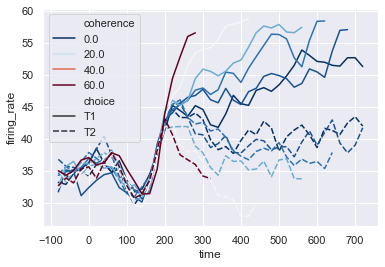

In [24]:
ax = sns.lineplot(x="time", y="firing_rate",hue="coherence", style="choice",data=dots, palette="RdBu_r")